In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(1, "../")
from _generate_time_series import *
import _tracking as tk

Defining the inputs and paranmeters:

In [3]:
# stiffness and mass: 
kx=np.array([2,2,2])*4000
ky=np.array([1,1,1])*2000
m=np.array([1,1,1])*500



#number of time series to run
n=60 

#shapes for how the stiffnesses should behave trougout the time series:
shapey=np.ones(n)
shapex=np.hstack((np.ones(n//2),np.linspace(1,3,n//2)))

#What modal orders to run in the cov-ssi:
orders=np.arange(2,50,1)

#sampling frequency and lengt of each time series:
fs=10        #Hz
T_max=3000  #sec
t=np.arange(0,T_max,1/fs)



Setting up the system and generating responses

In [4]:
true_w,responses=generate_dynamic_series(kx,ky,shapex,shapey,m,t,load='random',plot=False)

Run COV-ssi on the reasponses

In [5]:
lambds,phis=create_input_COVssi(responses,t,orders)

Plotting the output 

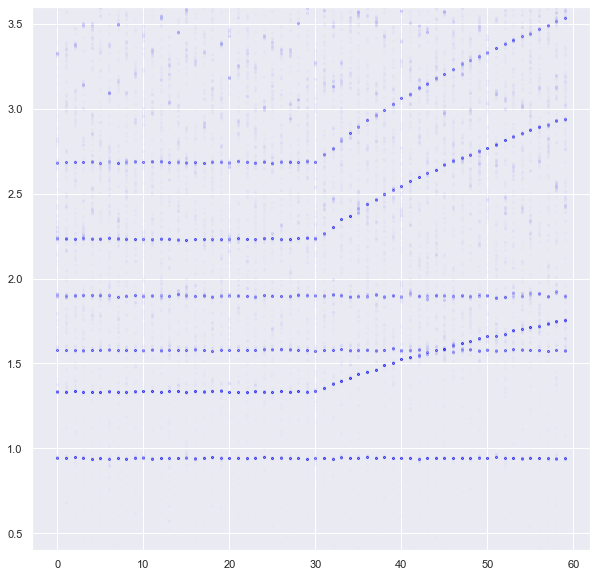

(0.4, 3.6)

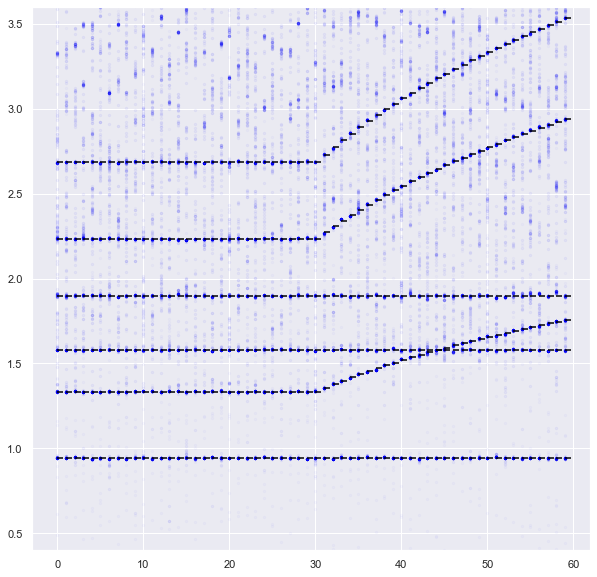

In [6]:
ys=create_output_guassian(lambds)

til_jon=ys.T

plt.figure(figsize=(10,10))
for k,s in enumerate(ys): 
    plt.scatter(s*0+k,s,s=6,alpha=0.005,color='blue')
plt.ylim(0.4,3.6)
plt.show()

plt.figure(figsize=(10,10))
for k,s in enumerate(ys): 
    plt.scatter(s*0+k,s,s=6,alpha=0.02,color='blue')
    plt.scatter(true_w[k]*0+k,true_w[k],color='black',marker=1)
plt.ylim(0.4,3.6)

In [17]:
print(til_jon.shape)
F_track_test = tk.trackingGaussian(til_jon, N_lim = 700, Bf = 0.1, Nt = 20, epsilon = 0.7, sf = 0.1)

(1224, 60)


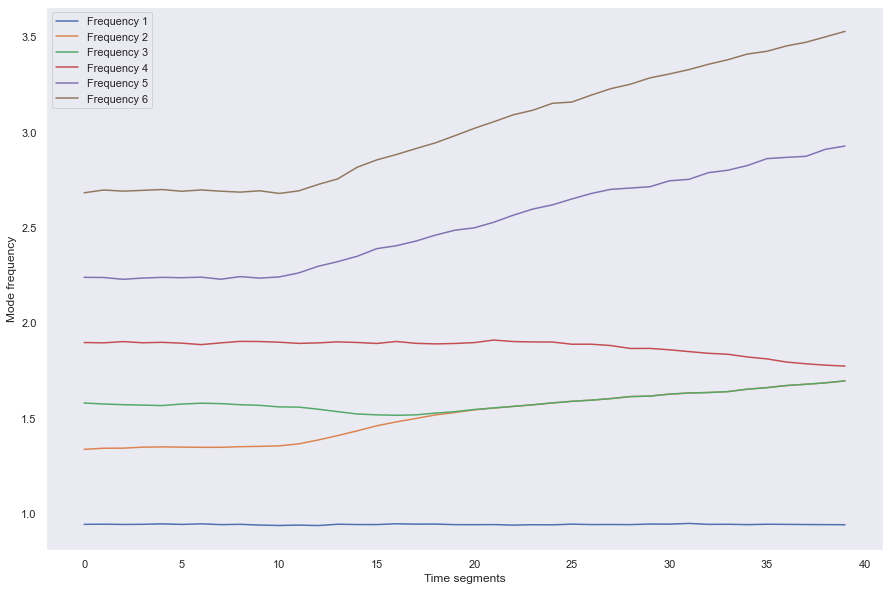

In [18]:
tk.tracking_plot(F_track_test)